In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# csv from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
dfTotal = pd.read_csv('covid19.csv')

dfTotal.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtoday,percentoday,numtested
0,35,Ontario,Ontario,31-01-2020,3,0,0,3,3,3.0,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,1,1.0,NaN
2,1,Canada,Canada,31-01-2020,4,0,0,4,4,4.0,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0,3,0,0.0,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0,4,3,3.0,NaN


In [3]:
# extracting data from Ontario
ontario = dfTotal.loc[dfTotal['pruid'] == 35]
ontario.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtoday,percentoday,numtested
0,35,Ontario,Ontario,31-01-2020,3,0,0,3,3,3.000,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0,3,0,0.000,NaN
6,35,Ontario,Ontario,16-02-2020,3,0,0,3,0,0.000,NaN
9,35,Ontario,Ontario,21-02-2020,3,0,0,3,0,0.000,NaN
12,35,Ontario,Ontario,24-02-2020,4,0,0,4,1,0.333,NaN


In [4]:
# extracting confirmed cases and dates
confirmedCases = ontario.transpose().iloc[7]
dates = ontario.transpose().iloc[3]

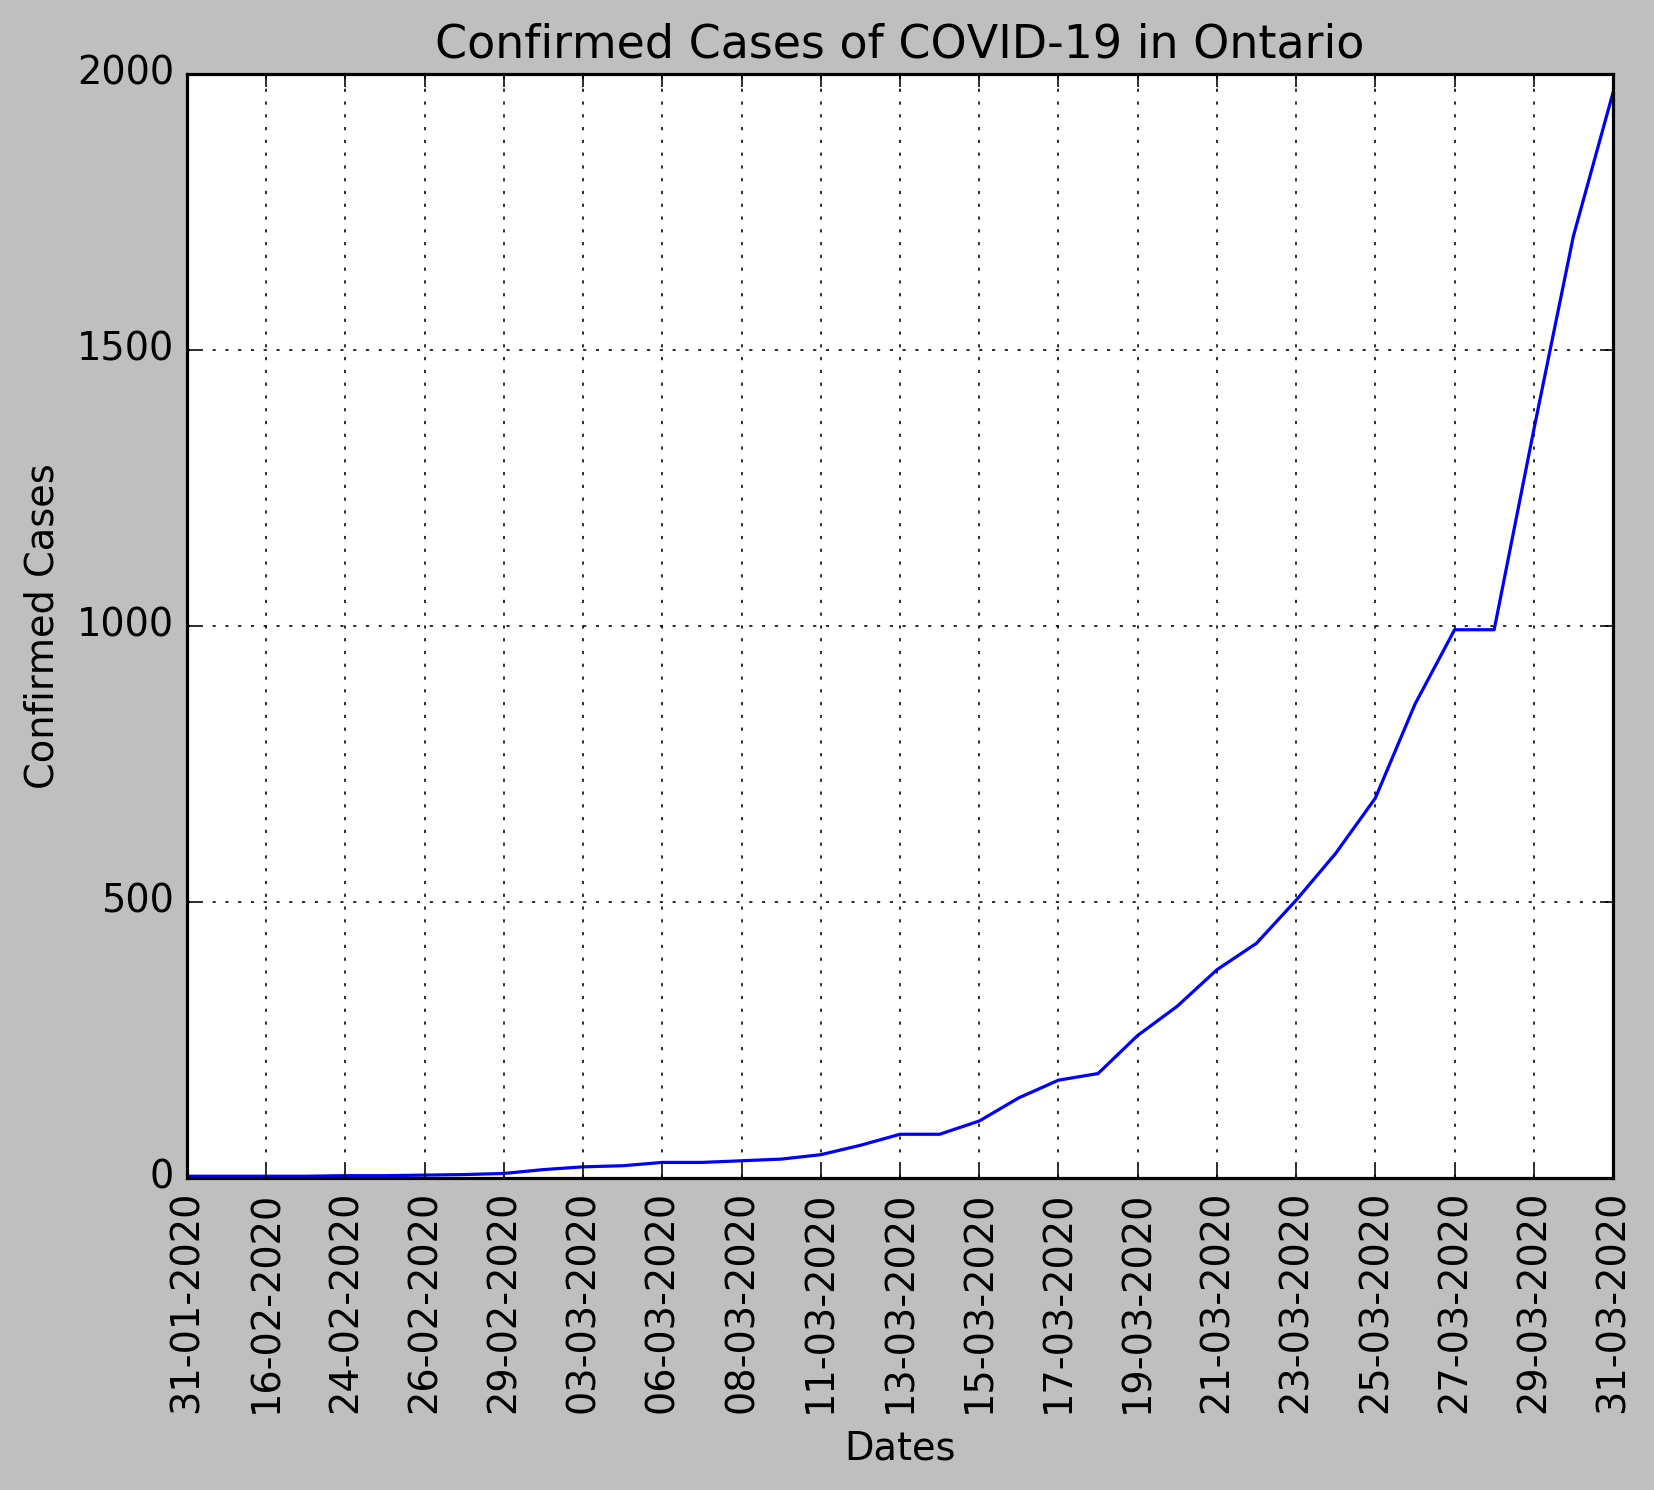

In [5]:
plt.style.use('classic')
fig, ax = plt.subplots(dpi=230)

ax.plot(dates.iloc[0:], confirmedCases.iloc[0:])

ax.set_xlabel('Dates')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases of COVID-19 in Ontario')

# https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=90)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
ax.xaxis.set_major_locator(plt.MultipleLocator(2)) 

plt.grid()

plt.show()

In [6]:
# plotting cases in Ontario compared to Canada
canada = dfTotal.loc[dfTotal['pruid'] == 1]

canada.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtoday,percentoday,numtested
2,1,Canada,Canada,31-01-2020,4,0,0,4,4,4.000,NaN
5,1,Canada,Canada,08-02-2020,7,0,0,7,3,0.750,NaN
8,1,Canada,Canada,16-02-2020,8,0,0,8,1,0.143,NaN
11,1,Canada,Canada,21-02-2020,9,0,0,9,1,0.125,NaN
14,1,Canada,Canada,24-02-2020,10,0,0,10,1,0.111,NaN


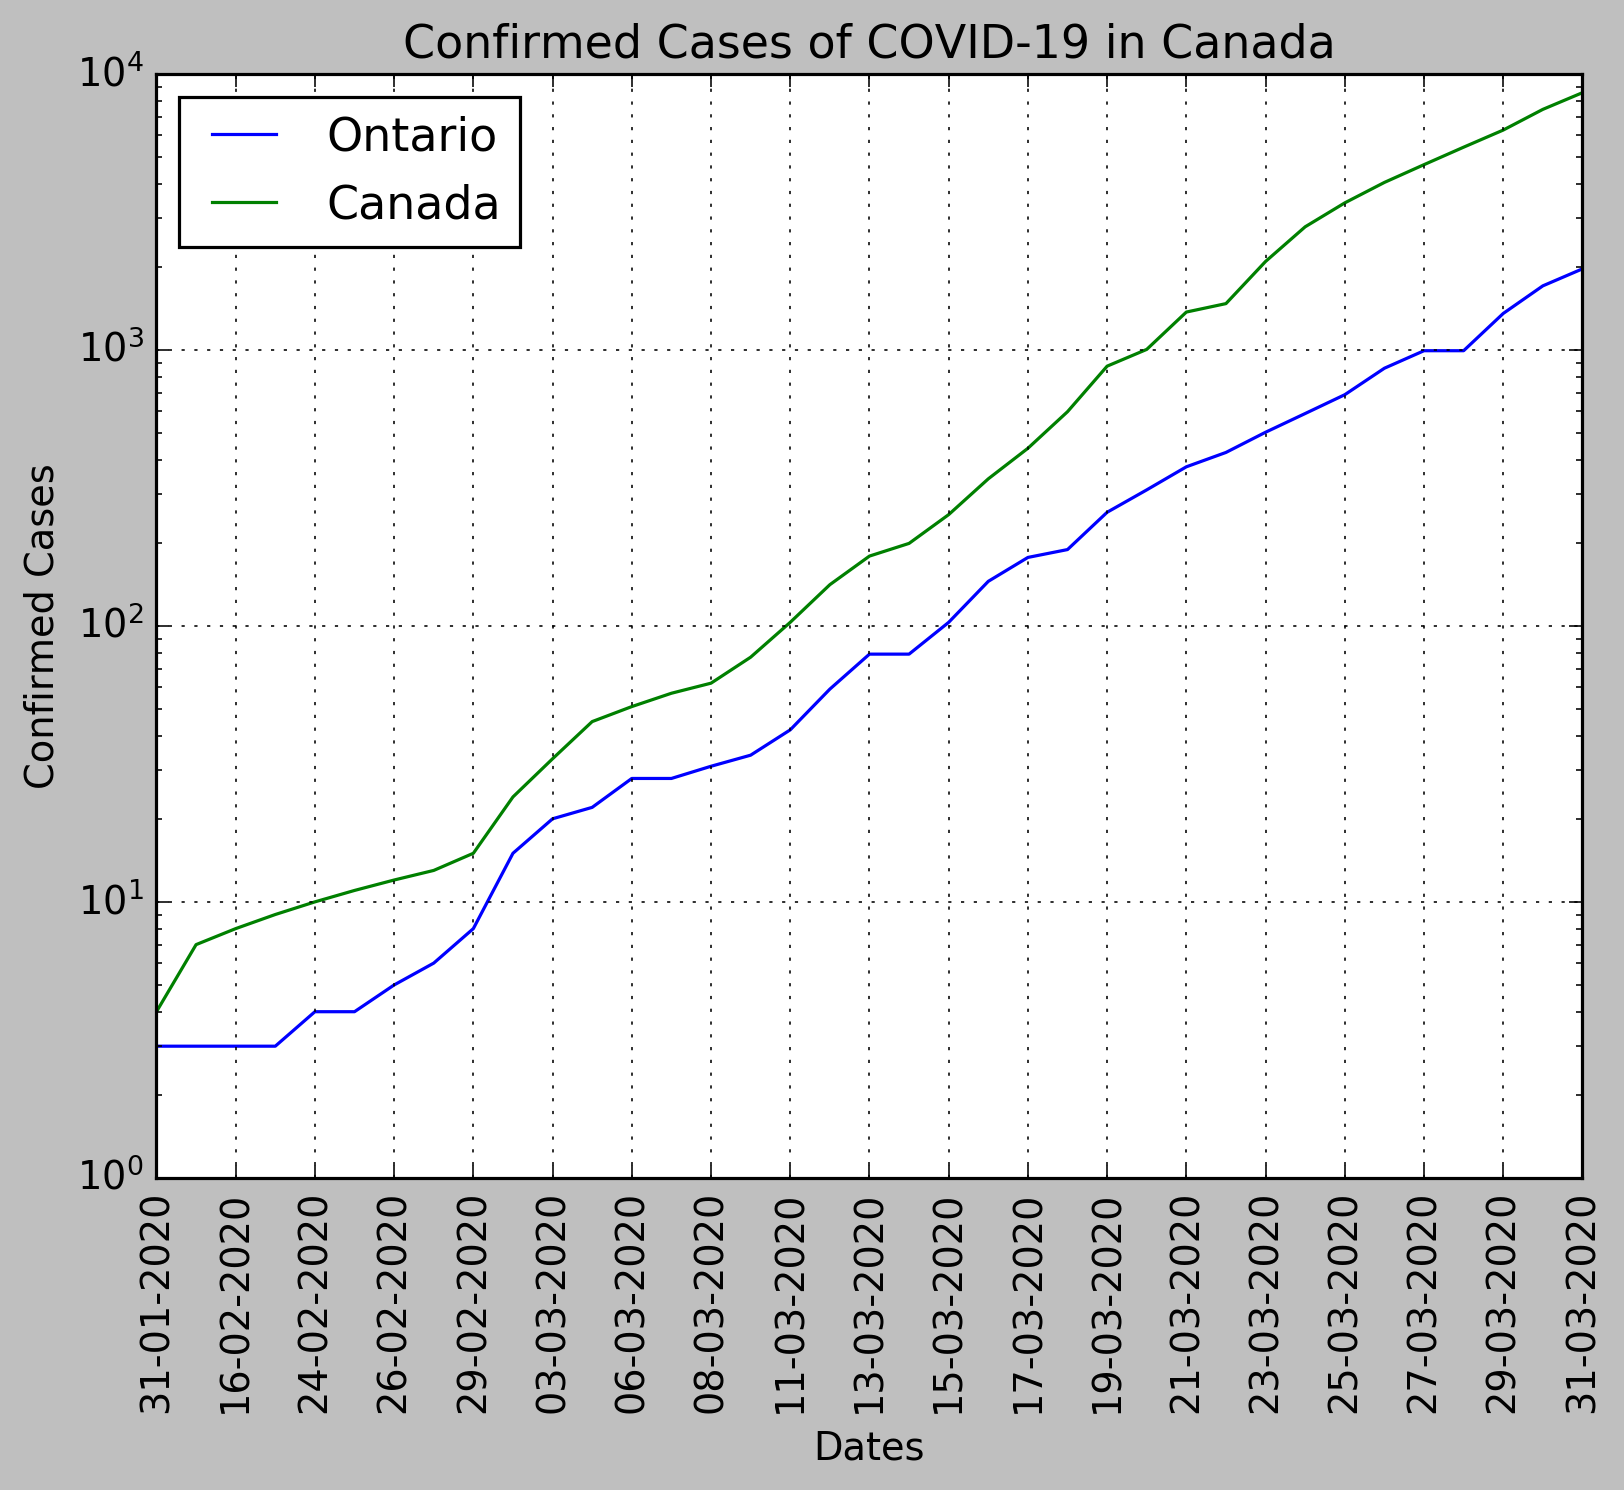

In [7]:
canadaConfirmedCases = canada.transpose().iloc[7]

plt.style.use('classic')
fig, ax = plt.subplots(dpi=230)

ax.semilogy(dates.iloc[0:], confirmedCases.iloc[0:], label='Ontario')
ax.semilogy(dates.iloc[0:], canadaConfirmedCases.iloc[0:], label='Canada')

ax.set_xlabel('Dates')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases of COVID-19 in Canada')

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(2)) 

plt.legend(loc=2)
plt.grid()
plt.show()